In [1]:
a = 10
a

10

In [ ]:
# Learning pytransit fitting

In [1]:
import pytransit as trans
import numpy as np
import matplotlib.pyplot as plt
from corner import corner


/home/abraham/miniconda3/envs/pytrans/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


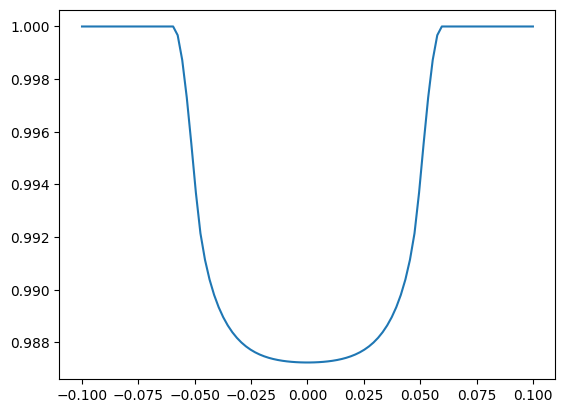

In [2]:
time = np.linspace(-0.1,0.1,100)

tm = trans.QuadraticModel()
tm.set_data(time)
flux = tm.evaluate(k=0.1, ldc=[0.2, 0.9], t0=0.0, p=1.0, a=3.0, i=0.5*np.pi)

plt.plot(time,flux)
plt.show()


In [14]:
time, flux, true_pars = trans.create_mock_light_curve(texp=55, passband='Kepler', noise=3e-6, transit_pars={'period':1})

In [15]:
type(flux)

numpy.ndarray

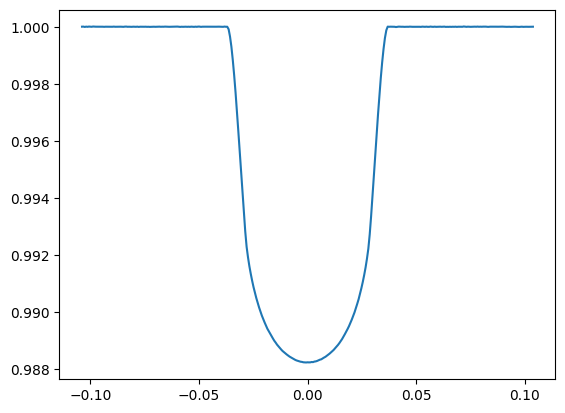

In [16]:
plt.plot(time, flux)
plt.show()

In [17]:
true_pars


{'t0': 0.0,
 'period': 1,
 'ror': 0.1,
 'rho': 1.5,
 'b': 0.5,
 'ecc': 0.0,
 'omega': 0.0,
 'aor': 4.296199564541045,
 'inc': 1.4541500542693309}

In [18]:
ta = trans.TransitAnalysis(name='tutorial_1', passbands='Kepler', times=time, fluxes=flux)


In [19]:
ta.print_parameters(1)


  0 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf]
  1 |G| tc_1           N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf]
  2 |G| p_1            N(μ = 1.0, σ = 1e-05)                    [    0.00 ..      inf]
  3 |G| b_1            U(a = 0.0, b = 1.0)                      [    0.00 ..      inf]
  4 |G| k2_1           U(a = 0.0004, b = 0.04000000000000001)   [    0.00 ..      inf]
  5 |G| secw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  6 |G| sesw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  7 |P| q1_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  8 |P| q2_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  9 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]


In [20]:
ta.set_prior('p_1', 'NP', 1.0, 0.001)


In [21]:
ta.print_parameters(1)

  0 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf]
  1 |G| tc_1           N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf]
  2 |G| p_1            N(μ = 1.0, σ = 0.001)                    [    0.00 ..      inf]
  3 |G| b_1            U(a = 0.0, b = 1.0)                      [    0.00 ..      inf]
  4 |G| k2_1           U(a = 0.0004, b = 0.04000000000000001)   [    0.00 ..      inf]
  5 |G| secw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  6 |G| sesw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  7 |P| q1_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  8 |P| q2_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  9 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]


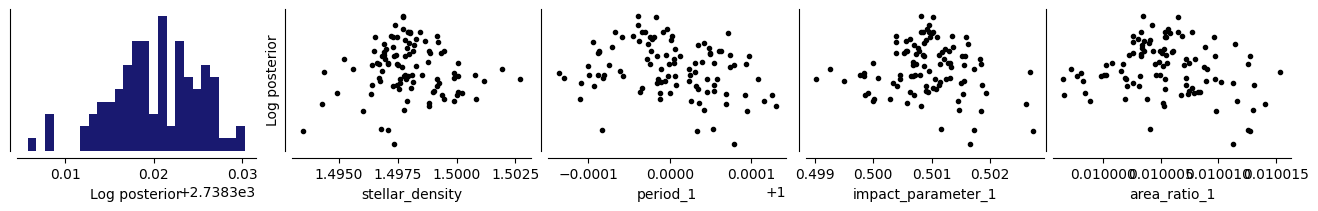

In [22]:
ta.optimize_global(niter=500, npop=100)


In [23]:
# To get the parameters of the best fit

ta.de.minimum_location


array([ 1.49771338e+00,  7.90368643e-07,  9.99961666e-01,  5.00813599e-01,
        1.00035132e-02, -4.16852367e-08,  1.89771561e-07,  6.55891800e-01,
        2.65182642e-01, -3.99999731e+00])

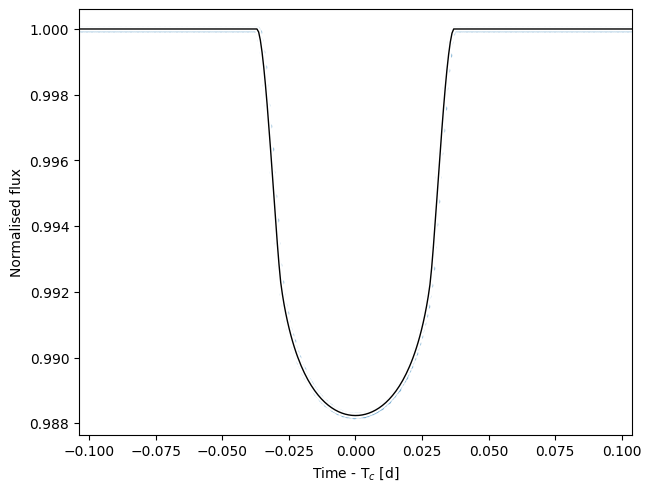

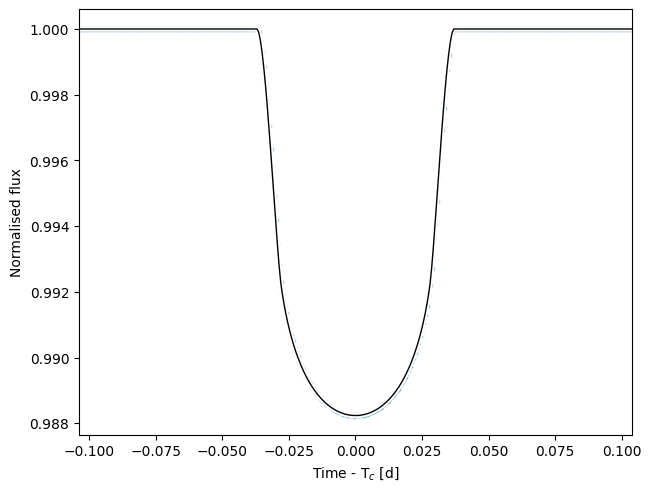

In [24]:
ta.plot_light_curves(method='fit')


In [ ]:
ta.save()

In [26]:
ta.print_parameters(columns=1)

  0 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf]
  1 |G| tc_1           N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf]
  2 |G| p_1            N(μ = 1.0, σ = 0.001)                    [    0.00 ..      inf]
  3 |G| b_1            U(a = 0.0, b = 1.0)                      [    0.00 ..      inf]
  4 |G| k2_1           U(a = 0.0004, b = 0.04000000000000001)   [    0.00 ..      inf]
  5 |G| secw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  6 |G| sesw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  7 |P| q1_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  8 |P| q2_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  9 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]


In [27]:
ta.sample_mcmc(niter=2000, thin=20, repeats=3, save=False)

MCMC sampling: 100%|██████████| 3/3 [18:11<00:00, 363.87s/it]


In [28]:
ta.save()

In [29]:
df = ta.posterior_samples()

/home/abraham/miniconda3/envs/pytrans/lib/python3.10/site-packages/arviz/data/inference_data.py:1509: UserWarning: The group derived_parameters is not defined in the InferenceData scheme
  warnings.warn(


In [ ]:
ta.plot_light_curves(method='posterior')

In [ ]:
ta.plot_light_curves?

In [ ]:
ta.print_parameters(1)

In [ ]:
df = ta.posterior_samples()

In [ ]:
ta.posterior_samples?

In [ ]:
df

In [31]:
df.posterior.q1_Kepler
# df.posterior.q2_Kepler


<xarray.DataArray 'q1_Kepler' (chain: 100, draw: 100)>
array([[0.70119268, 0.7020545 , 0.72073664, ..., 0.68063033, 0.71623615,
        0.70047272],
       [0.59919538, 0.67253623, 0.62923823, ..., 0.64767146, 0.67011324,
        0.69642846],
       [0.71513124, 0.72216887, 0.71792949, ..., 0.71411839, 0.70559847,
        0.71256257],
       ...,
       [0.63724689, 0.68263186, 0.68199331, ..., 0.64814989, 0.63939824,
        0.61467414],
       [0.54048612, 0.52011539, 0.52688234, ..., 0.55795224, 0.65780863,
        0.5752582 ],
       [0.72629611, 0.68704082, 0.66991098, ..., 0.61323069, 0.63512872,
        0.69385766]])
Coordinates:
  * chain    (chain) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [32]:
df.posterior.q2_Kepler


<xarray.DataArray 'q2_Kepler' (chain: 100, draw: 100)>
array([[0.24107956, 0.24807888, 0.24146707, ..., 0.25936616, 0.24888942,
        0.25827055],
       [0.2935988 , 0.27409744, 0.30889771, ..., 0.29666157, 0.2642682 ,
        0.25697611],
       [0.23651569, 0.23240326, 0.22912117, ..., 0.24936598, 0.261208  ,
        0.26072512],
       ...,
       [0.26638255, 0.24943576, 0.24814977, ..., 0.28300457, 0.29163657,
        0.3091241 ],
       [0.34729046, 0.36148171, 0.35357027, ..., 0.3377124 , 0.28409372,
        0.3237653 ],
       [0.21826027, 0.23706019, 0.2477538 , ..., 0.27676977, 0.26078098,
        0.23177036]])
Coordinates:
  * chain    (chain) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [ ]:
corner(df.posterior[['q1_Kepler', 'q2_Kepler']]);
